# Are police officers and fire fighters paid the same?

We'll look at the earnings data over all years to see how the pay for police officers and fire fighters is changing.

In [1]:
# special Jupyter Notebook command to prepare the notebook for matplotlib and other libraries
%matplotlib inline

# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ordinary least squares
from statsmodels.stats.weightstats import ztest

plt.style.use('seaborn-colorblind')


# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("darkgrid")
sns.set_context("notebook")

In [2]:
# read cleaned data file
earnings = pd.read_csv('earnings.csv', index_col=False)
earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152544 entries, 0 to 152543
Data columns (total 15 columns):
name           152544 non-null object
department     152544 non-null object
title          152544 non-null object
regular        152544 non-null float64
retro          152544 non-null float64
other          152544 non-null float64
overtime       152544 non-null float64
injured        152544 non-null float64
detail         152544 non-null float64
quinn          152544 non-null float64
total          152544 non-null float64
zip            152544 non-null object
year           152544 non-null int64
dept_clean     152544 non-null object
title_clean    152544 non-null object
dtypes: float64(8), int64(1), object(6)
memory usage: 17.5+ MB


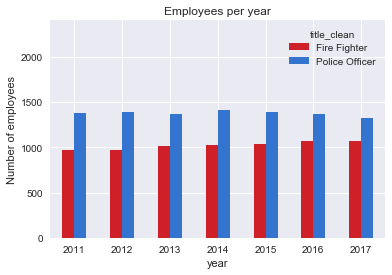

In [3]:
""" police officers and fire fighters

The data will be limited to police officers and fire fighters who received at least $50,000 
regular earnings. This is an attempt to remove new hires, retirees, part timers and other
non-standard employees.

"""

pf = earnings[(earnings['title_clean'].isin(['Police Officer', 'Fire Fighter'])) & (earnings['regular'] > 50000)]
pf_pt = pf.pivot_table(columns='title_clean', index='year', values='name', aggfunc='count')
pf_pt.plot.bar(color=['#ce2029', '#3473ce']);
plt.title('Employees per year')
plt.ylim(0, 2400)
plt.ylabel('Number of employees')
plt.xticks(rotation=0)
plt.show()

There are roughly 1000 fire fighters and 1400 police officers working for the city of Boston. Over the years 2011 through 2017 we can observe a slight decrease in the number of police officers starting in 2014. Fire fighters, on the other hand, have gradually grown in numbers since 2012. 

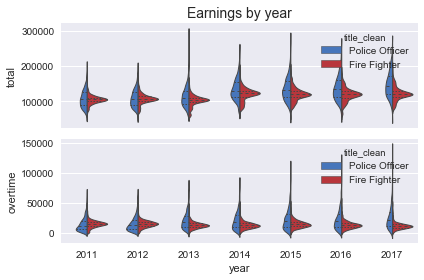

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.set_title('Earnings by year', fontsize=14)
ax1.get_xaxis().set_visible(False)
sns.violinplot(x='year', y='total', hue='title_clean', data=pf, 
               split=True, ax=ax1, inner='quartile', linewidth=1, 
               palette=['#3473ce', '#ce2029']);
sns.violinplot(x='year', y='overtime', hue='title_clean', data=pf, 
               split=True, ax=ax2, inner='quartile', linewidth=1, 
               palette=['#3473ce', '#ce2029']);
plt.tight_layout()
plt.show()

The median total earnings for police officers and fire fighters is around $100,000 to $150,000, 
steadily growing over the years. Interestingly, the median total earnings for police officers has grown significantly 
more than for fire fighters. Similarly, the overtime pay is approximately $15,000 a year for both groups in 2011. 
Starting in 2013, overtime pay for police officers is steadily increasing to above $20,000 in 2017, 
but there is no clear change in median overtime pay for fire fighters.

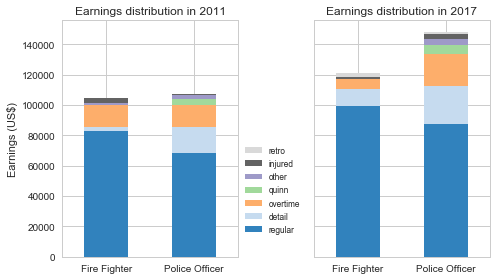

In [5]:
# plot earnings distribution for 2011 and 2017

sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 4), sharey=True)
ax1 = pf[pf.year == 2011]\
        .groupby('title_clean')\
        .agg(np.mean)\
        .drop(['total','year'], axis=1)\
        .sort_values(by='Police Officer', ascending=False, axis=1)\
        .plot.bar(stacked=True, title='Earnings distribution in 2011', ax=ax1, cmap='tab20c');
ax1.set_ylabel('Earnings (US$)')
ax2 = pf[pf.year == 2017]\
        .groupby('title_clean')\
        .agg(np.mean)\
        .drop(['total','year'], axis=1)\
        .sort_values(by='Police Officer', ascending=False, axis=1)\
        .plot.bar(stacked=True, title='Earnings distribution in 2017', ax=ax2, legend=False, cmap='tab20c');

ax1.set_xticklabels(['Fire Fighter', 'Police Officer'], rotation=0)
ax2.set_xticklabels(['Fire Fighter', 'Police Officer'], rotation=0)
ax1.set_xlabel('')
ax2.set_xlabel('')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], prop={'size': 'small'},bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

sns.set_style("darkgrid") 

# ax = pf.groupby(['year', 'title_clean']).agg(np.mean).drop(['total'], axis=1)\
#                     .plot.bar(stacked=True, title='Earnings distribution')
# ax.set_ylabel('Earnings (US$)')
# plt.show()

The earnings distributions for 2011 shows almost equal total mean earnings, however fire fighters receive higher regular pay. Police officers make up the difference with ***detail*** and ***quinn*** earnings. In 2017 police officers on average dramatically increased all earnings categories, in particular ***overtime***, whereas fire fighter see a reduction in overtime pay.

### Are police officers and fire fighters paid the same?

Let's extract the total and regular earnings for police officers and fire fighters for each year. The null hypothesis is no difference in earnings for both job titles and a significance (p) of 0.05, or a less than 5% chance that a difference is found when in fact there is none.

In [6]:
pf = earnings[(earnings['title_clean'].isin(['Police Officer', 'Fire Fighter'])) & (earnings['regular'] > 50000)]
years = sorted(set(pf['year']))
z_year = []
p_year = []
for year in years:
    po = pf['overtime'][(pf.year == year) & (pf.title_clean == 'Police Officer')]
    ff = pf['overtime'][(pf.year == year) & (pf.title_clean == 'Fire Fighter')]
    z, p = ztest(po, ff)
    z_year.append(z)
    p_year.append(p)
print('Year:', 'z-stat:', 'p:')
for p in zip(years, z_year, p_year):
    print(p[0], '{:4.2f}'.format(p[1]),'{: .2g}'.format(p[2]))


Year: z-stat: p:
2011 -1.11  0.27
2012 -0.33  0.74
2013 16.77  4.2e-63
2014 15.52  2.5e-54
2015 14.24  5.5e-46
2016 16.69  1.5e-62
2017 21.91  2.3e-106


Year: z-stat: p:
2011 3.10  0.002
2012 2.13  0.033
2013 11.23  3e-29
2014 12.77  2.3e-37
2015 13.62  2.9e-42
2016 16.27  1.6e-59
2017 22.01  2.2e-107


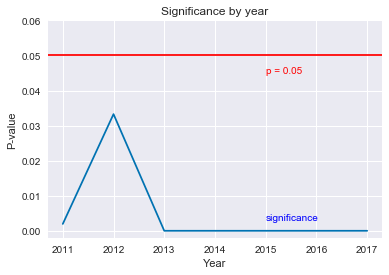

In [7]:
# Test the hypothesis, calculate p-values:
years = sorted(set(pf.year))
z_year = []
p_year = []
for year in years:
    po = pf['total'][(pf.year == year) & (pf.title_clean == 'Police Officer')]
    ff = pf['total'][(pf.year == year) & (pf.title_clean == 'Fire Fighter')]
    z, p = ztest(po, ff)
    z_year.append(z)
    p_year.append(p)
print('Year:', 'z-stat:', 'p:')
for p in zip(years, z_year, p_year):
    print(p[0], '{:4.2f}'.format(p[1]),'{: .2g}'.format(p[2]))
    
# plot the p-values:
plt.figure()
plt.plot(years, p_year);
plt.title('Significance by year')
plt.xlabel('Year')
plt.ylabel('P-value')
plt.text(2015, 0.045,'p = 0.05', color='r')
plt.text(2015, 0.003,'significance', color='b')
plt.ylim(-0.002, 0.06)
plt.axhline(0.05, color='r')
plt.show()

The results show that `p < 0.05` for all years, indicating we should reject the null hypothesis. As can be seen from the violin plot above, the differences in 2011 and 2012 are very small and the corresponding p values are the highest from this analysis. Over the following years the difference in total earnings is becoming more and more statistically significant.

### Now let's look at overtime pay:

Year: z-stat: p:
2011 -1.11  0.27
2012 -0.33  0.74
2013 16.77  4.2e-63
2014 15.52  2.5e-54
2015 14.24  5.5e-46
2016 16.69  1.5e-62
2017 21.91  2.3e-106


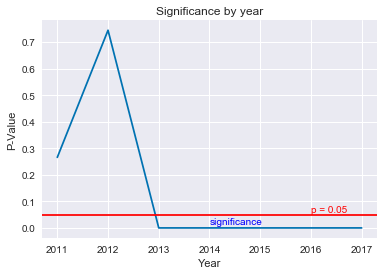

In [8]:
# Test the hypothesis, calculate p-values:
z_year = []
p_year = []
for year in years:
    po = earnings['overtime'][(earnings.year == year) & (earnings.title_clean == 'Police Officer')& (earnings.regular >50000)]
    ff = earnings['overtime'][(earnings.year == year) & (earnings.title_clean == 'Fire Fighter')& (earnings.regular >50000)]
    z, p = ztest(po, ff)
    z_year.append(z)
    p_year.append(p)
print('Year:', 'z-stat:', 'p:')
for p in zip(years, z_year, p_year):
    print(p[0], '{:4.2f}'.format(p[1]),'{: .2g}'.format(p[2]))
    
# plot the p-values:
plt.figure()
plt.plot(years, p_year);
plt.title('Significance by year')
plt.xlabel('Year')
plt.ylabel('P-Value')
plt.text(2016, 0.06,'p = 0.05', color='r')
plt.text(2014, 0.015,'significance', color='b')
plt.axhline(0.05, color='r')
plt.show()

For the years 2011 and 2012 `p > 0.05`, we therefore fail to reject the null hypothesis and claim there is no statistically significant difference in overtime pay between police officers and fire fighters. After 2013 the difference becomes significant.

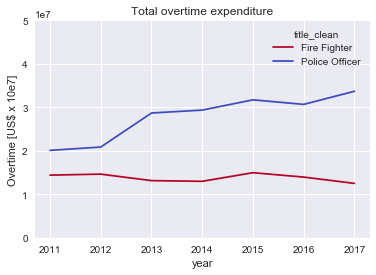

In [9]:
# fire fighters vs. police officers: Overtime

ff = earnings[(earnings['title_clean'] == 'Police Officer')\
                             | (earnings['title_clean'] == 'Fire Fighter')]

ff_pt = pd.pivot_table(ff, values='overtime', index='year', columns='title_clean', aggfunc=np.sum)
ff_pt.plot(cmap='coolwarm_r');
plt.title('Total overtime expenditure')
plt.ylabel('Overtime [US$ x 10e7]')
plt.ylim(0,50000000)
plt.show()

The plot above shows the total overtime expenditure for two job titles. If overtime for police officers were frozen at 2011 levels, the city would save approximately $18 million in 2017. Any reduction in overtime hours has the potential to return significant savings, since there are more job titles that show overtime earnings.